In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\chait\Downloads\height-weight (1).csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'HEight')

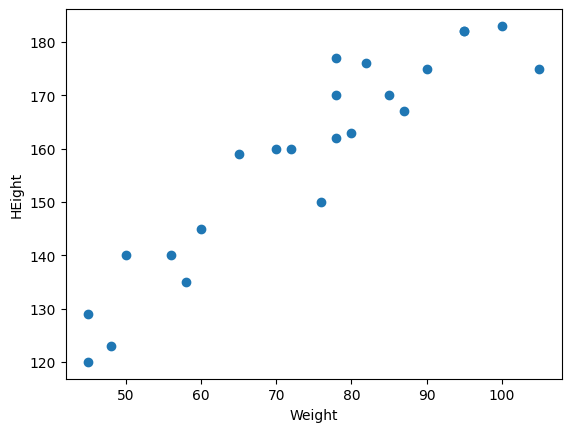

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('HEight')

In [4]:
X=df[['Weight']] #independent features
Y=df['Height']  # dependent feature

In [5]:
## tarin test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [7]:
# standardize the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
x_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [9]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

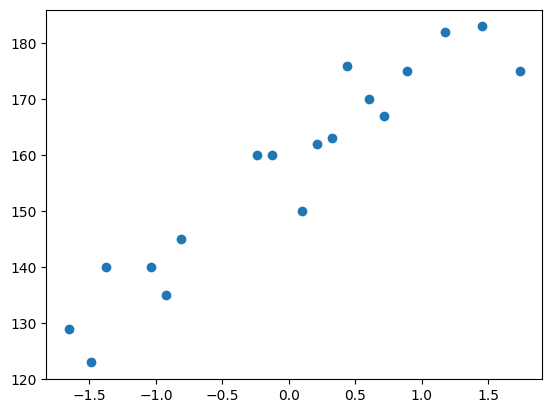

In [10]:
plt.scatter(x_train,y_train)

In [11]:
# training the simple linear regression model

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [12]:
regressor.fit(x_train,y_train)

LinearRegression()

In [13]:
print('slope or coefficient:',regressor.coef_)
print('intercept:',regressor.intercept_)

slope or coefficient: [17.03440872]
intercept: 157.5


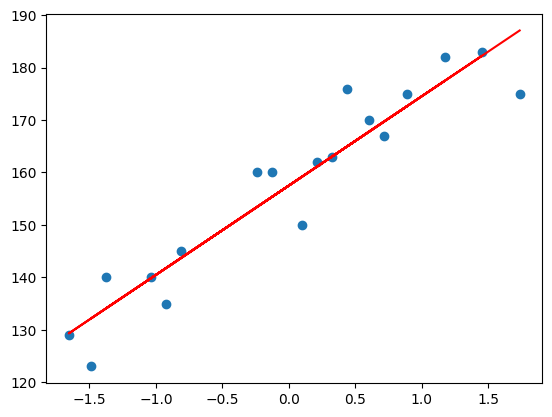

In [14]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [15]:
y_pred_test=regressor.predict(x_test)

In [17]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

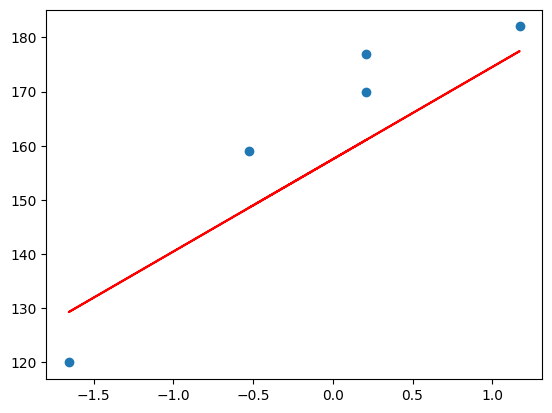

In [20]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)

mse: 109.77592599051664
mae: 9.822657814519232
rmse: 10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [28]:
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [30]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [31]:
regressor

LinearRegression()

In [32]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [33]:
scaled_weight[0]

array([0.32350772])

In [34]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


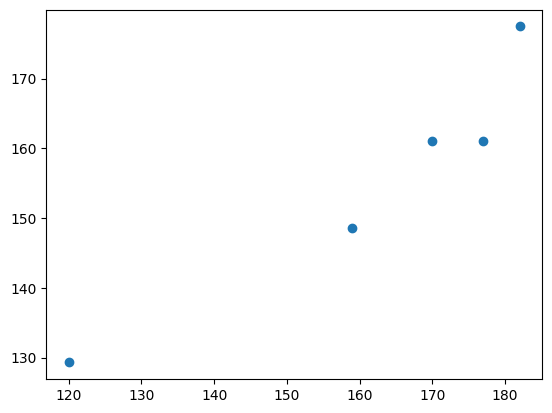

In [35]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [36]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

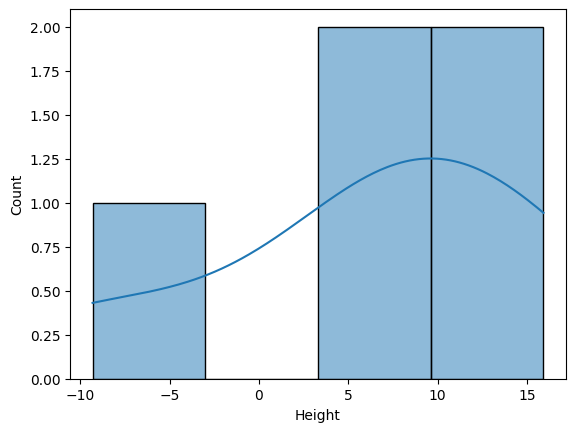

In [38]:
## plot this residuals
import seaborn as sns
sns.histplot(residuals,kde=True)

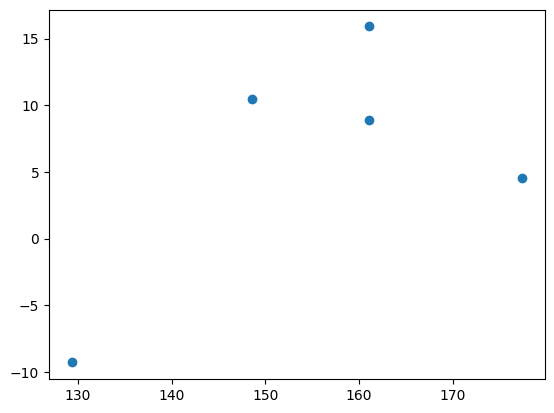

In [39]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)